# Ridge and Tube detection

> See also [Ridge detection](https://en.wikipedia.org/wiki/Ridge_detection)

Ridges, in 2d, and Tubes, in 3d, are structure requiering more advance filter to detect. As they can be characterise in 2d as a double edge, any gradient filtering will produce a double response making the detection not trivial (see [edge detection example](./edge_detection_and_enhancement.ipynb) for more on this). Ridge detector rely instead on the hessian matrix eigen values response. 

An iconic filter is the Sato Filter [(Sato et. al., 1998)](https://doi.org/10.1016/S1361-8415(98)80009-1) which you can also find in [scikit-image](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sato) or Fiji under the name [Tubeness](https://imagej.net/plugins/tubeness).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyclesperanto as cle

from skimage import data, color
from skimage.io import imread

cle.select_device(1,"gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.274.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

### Example

The Sato Filter is a multi-scale filter to detected bright ridges on a dark background. Here the sigma is directly related to the scale (width) of the ridge to detect.

> Note: the algorithm cumulate the maximum filter response over the sigma range which, for a large range, can introduce noise in the response.  

A good way to test such filter is on a the `brick` image from skimage dataset:

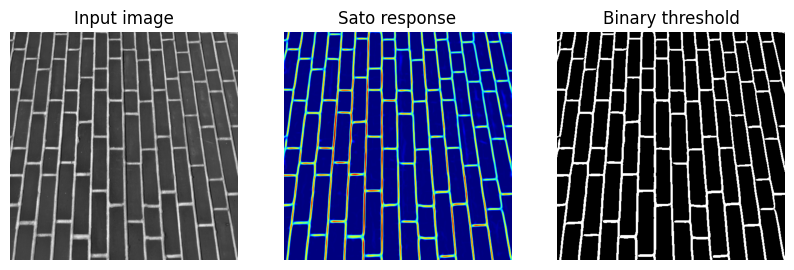

In [2]:
response = cle.sato_filter(data.brick(), sigma_minimum=1, sigma_maximum=4, sigma_step=1)

fig, axs = plt.subplots(1,3, figsize=(10,20))
axs[0].imshow(data.brick(), cmap="gray")
axs[0].set_title("Input image")
axs[1].imshow(response, cmap="jet")
axs[1].set_title("Sato response")
axs[2].imshow(cle.threshold_otsu(response).get(), cmap="gray")
axs[2].set_title("Binary threshold")
for ax in axs:
    ax.axis('off')
    
plt.show()

Example response on the `retina` image from the skimage dataset:

Here the image need some pre-processing before applying the Sato filter:
- It is an RGB image that we need to convert into a grayscale image
- The image expose dark ridges with light background, we need to invert for the filter to work correctly

In [52]:
image = color.rgb2gray(data.retina())
inverted = -image

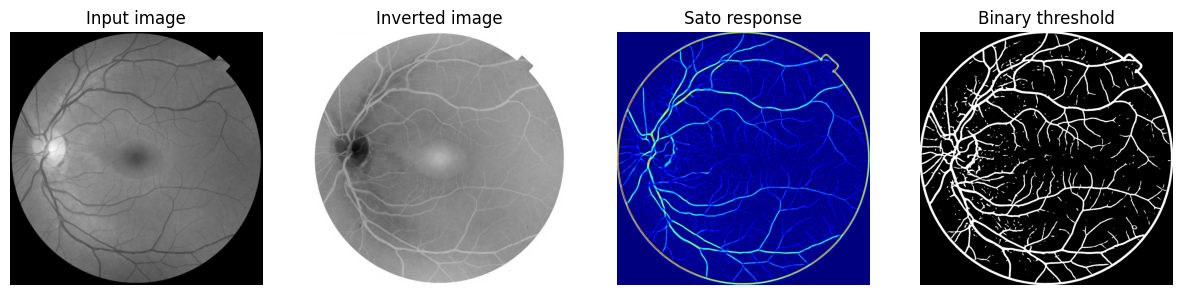

In [65]:
response = cle.sato_filter(inverted, sigma_minimum=0.5, sigma_maximum=5, sigma_step=0.5)

fig, axs = plt.subplots(1,4, figsize=(15,40))
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Input image")
axs[1].imshow(inverted, cmap="gray")
axs[1].set_title("Inverted image")
axs[2].imshow(response, cmap="jet")
axs[2].set_title("Sato response")
axs[3].imshow(cle.greater_or_equal_constant(response, scalar=0.05).get(), cmap="gray")
axs[3].set_title("Binary threshold")
for ax in axs:
    ax.axis('off')
plt.show()

## 3D Images and Tube detection

Ridges in 3d transforme into tube structure. In 3d, we can use the Sato filter to detect tube shape structure like filament or microtubule, especially in a low contrast context. 

> Important: while most of the filter in pyclesperanto take a specific sigma parameter per dimension (x,y,z) it is not the case here. The sigma will isometricaly applied, hence it is relevant to correct the image for possible anisotropy. See the [3D segmentation example](./segmentation_3d.ipynb) for more information on this step.


Cheers, and have fun with this filter!

In [ ]:
be